In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.options.display.max_columns = 999

In [64]:
from statsmodels.regression.linear_model import OLS

How should I use ela performance and arts survey data?

In [3]:
df = pd.read_csv('resources/17_18_Arts_and_Performance.csv')
df.head()

/home/eric/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (676,677,678,679,680,681,682,683,684,685,686,693,694,695,696,697,698,699,700,701,702,703,710,711,712,713,714,715,716,717,718,719,720,727,728,729,730,731,732,733,734,735,736,737,744,745,746,747,748,749,750,751,752,753,754,761,762,763,764,765,766,767,768,769,770,771,778,779,780,781,782,783,784,785,786,787,788,812,813,814,815,816,817,818,819,820,821,822,829,830,831,832,833,834,835,836,837,838,839,846,847,848,849,850,851,852,853,854,855,856,863,864,865,866,867,868,869,870,871,872,873,880,881,882,883,884,885,886,887,888,889,890,897,898,899,900,901,902,903,904,905,906,907,914,915,916,917,918,919,920,921,922,923,924,931,932,933,934,935,936,937,938,939,940,941,965,966,967,968,969,970,971,972,973,974,975,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1186,1187,1188,1189,

,Q0_DBN,Q1_1,Q1_2,Q1_3,Q2_1,Q3_1,Q3_2,Q3_3,Q3_4,Q4_1,Q4_2,Q5_1,Q5_2,Q6_1,Q6_2,Q6_3,Q6_4,Q7_1,Q7_2,Q7_3,Q7_4,Q8_R1_C1,Q8_R1_C2,Q8_R2_C1,Q8_R2_C2,Q8_R3_C1,Q8_R3_C2,Q8_R4_C1,Q8_R4_C2,Q8_R5_C1,Q8_R5_C2,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q9_8,Q9_9,Q9_10,Q9_11,Q9_12,Q9_13,Q9_14,Q9_15,Q9_16,Q9_17,Q9_18,Q9_19,Q9_20,Q9_21,Q9_22,Q10_R1_C1,Q10_R1_C2,Q10_R2_C1,Q10_R2_C2,Q10_R3_C1,Q10_R3_C2,Q10_R4_C1,Q10_R4_C2,Q10_R5_C1,Q10_R5_C2,Q11_R1_C1,Q11_R1_C2,Q11_R1_C3,Q11_R1_C4,Q11_R2_C1,Q11_R2_C2,Q11_R2_C3,Q11_R2_C4,Q11_R3_C1,Q11_R3_C2,Q11_R3_C3,Q11_R3_C4,Q11_R4_C1,Q11_R4_C2,Q11_R4_C3,Q11_R4_C4,Q12_C1_R1,Q12_C1_R2,Q12_C1_R3,Q12_C1_R4,Q13_C1_R1,Q13_C1_R2,Q13_C1_R3,Q13_C1_R4,Q13_C2_R1,Q13_C2_R2,Q13_C2_R3,Q13_C2_R4,Q13_C3_R1,Q13_C3_R2,Q13_C3_R3,Q13_C3_R4,Q13_C4_R1,Q13_C4_R2,Q13_C4_R3,Q13_C4_R4,Q13_C5_R1,Q13_C5_R2,Q13_C5_R3,Q13_C5_R4,Q13_C6_R1,Q13_C6_R2,Q13_C6_R3,Q13_C6_R4,Q13_C7_R1,Q13_C7_R2,Q13_C7_R3,Q13_C7_R4,Q13_C8_R1,Q13_C8_R2,Q13_C8_R3,Q13_C8_R4,Q13_C9_R1,Q13_C9_R2,Q13_C9_R3,Q13_C9_R4,Q13_C10_R1,Q13_C10_R2,Q13_C10_R3,Q13_C10_R4,Q13_C11_R1,Q13_C11_R2,Q13_C11_R3,Q13_C11_R4,Q13_C12_R1,Q13_C12_R2,Q13_C12_R3,Q13_C12_R4,Q13_C13_R1,Q13_C13_R2,Q13_C13_R3,Q13_C13_R4,Q13_C14_R1,Q13_C14_R2,Q13_C14_R3,Q13_C14_R4,Q13_C15_R1,Q13_C15_R2,Q13_C15_R3,Q13_C15_R4,Q14_C1_R1,Q14_C1_R2,Q14_C1_R3,Q14_C1_R4,Q14_C2_R1,Q14_C2_R2,Q14_C2_R3,Q14_C2_R4,Q14_C3_R1,Q14_C3_R2,Q14_C3_R3,Q14_C3_R4,Q14_C4_R1,Q14_C4_R2,Q14_C4_R3,Q14_C4_R4,Q14_C5_R1,Q14_C5_R2,Q14_C5_R3,Q14_C5_R4,Q14_C6_R1,Q14_C6_R2,Q14_C6_R3,Q14_C6_R4,Q14_C7_R1,Q14_C7_R2,Q14_C7_R3,Q14_C7_R4,Q14_C8_R1,Q14_C8_R2,Q14_C8_R3,Q14_C8_R4,Q14_C9_R1,Q14_C9_R2,Q14_C9_R3,Q14_C9_R4,Q14_C10_R1,Q14_C10_R2,Q14_C10_R3,Q14_C10_R4,Q14_C11_R1,Q14_C11_R2,Q14_C11_R3,Q14_C11_R4,Q14_C12_R1,Q14_C12_R2,Q14_C12_R3,Q14_C12_R4,Q14_C13_R1,Q14_C13_R2,Q14_C13_R3,Q14_C13_R4,Q14_C14_R1,Q14_C14_R2,Q14_C14_R3,Q14_C14_R4,Q15_C1_R1,Q15_C1_R2,Q15_C1_R3,Q15_C1_R4,Q15_C2_R1,Q15_C2_R2,Q15_C2_R3,Q15_C2_R4,Q15_C3_R1,Q15_C3_R2,Q15_C3_R3,Q15_C3_R4,Q15_C4_R1,Q15_C4_R2,Q15_C4_R3,Q15_C4_R4,Q15_C5_R1,Q15_C5_R2,Q15_C5_R3,Q15_C5_R4,Q15_C6_R1,Q15_C6_R2,Q15_C6_R3,Q15_C6_R4,Q15_C7_R1,Q15_C7_R2,Q15_C7_R3,Q15_C7_R4,Q15_C8_R1,Q15_C8_R2,Q15_C8_R3,Q15_C8_R4,Q15_C9_R1,Q15_C9_R2,Q15_C9_R3,Q15_C9_R4,Q15_C10_R1,Q15_C10_R2,Q15_C10_R3,Q15_C10_R4,Q15_C11_R1,Q15_C11_R2,Q15_C11_R3,Q15_C11_R4,Q15_C12_R1,Q15_C12_R2,Q15_C12_R3,Q15_C12_R4,Q15_C13_R1,Q15_C13_R2,Q15_C13_R3,Q15_C13_R4,Q15_C14_R1,Q15_C14_R2,Q15_C14_R3,Q15_C14_R4,Q16_C1_R1,Q16_C1_R2,Q16_C1_R3,Q16_C1_R4,Q16_C2_R1,Q16_C2_R2,Q16_C2_R3,Q16_C2_R4,Q16_C3_R1,Q16_C3_R2,Q16_C3_R3,Q16_C3_R4,Q16_C4_R1,Q16_C4_R2,Q16_C4_R3,Q16_C4_R4,Q16_C5_R1,Q16_C5_R2,Q16_C5_R3,Q16_C5_R4,Q16_C6_R1,Q16_C6_R2,Q16_C6_R3,Q16_C6_R4,Q16_C7_R1,Q16_C7_R2,Q16_C7_R3,Q16_C7_R4,Q16_C8_R1,Q16_C8_R2,Q16_C8_R3,Q16_C8_R4,Q16_C9_R1,Q16_C9_R2,Q16_C9_R3,Q16_C9_R4,Q16_C10_R1,Q16_C10_R2,Q16_C10_R3,Q16_C10_R4,Q16_C11_R1,Q16_C11_R2,Q16_C11_R3,Q16_C11_R4,Q16_C12_R1,Q16_C12_R2,Q16_C12_R3,Q16_C12_R4,Q16_C13_R1,Q16_C13_R2,Q16_C13_R3,Q16_C13_R4,Q16_C14_R1,Q16_C14_R2,Q16_C14_R3,Q16_C14_R4,Q17_C1_R1,Q17_C1_R2,Q17_C1_R3,Q17_C1_R4,Q17_C2_R1,Q17_C2_R2,Q17_C2_R3,Q17_C2_R4,Q17_C3_R1,Q17_C3_R2,Q17_C3_R3,Q17_C3_R4,Q17_C4_R1,Q17_C4_R2,Q17_C4_R3,Q17_C4_R4,Q17_C5_R1,Q17_C5_R2,Q17_C5_R3,Q17_C5_R4,Q17_C6_R1,Q17_C6_R2,Q17_C6_R3,Q17_C6_R4,Q17_C7_R1,Q17_C7_R2,Q17_C7_R3,Q17_C7_R4,Q17_C8_R1,Q17_C8_R2,Q17_C8_R3,Q17_C8_R4,Q17_C9_R1,Q17_C9_R2,Q17_C9_R3,Q17_C9_R4,Q17_C10_R1,Q17_C10_R2,Q17_C10_R3,Q17_C10_R4,Q17_C11_R1,Q17_C11_R2,Q17_C11_R3,Q17_C11_R4,Q17_C12_R1,Q17_C12_R2,Q17_C12_R3,Q17_C12_R4,Q17_C13_R1,Q17_C13_R2,Q17_C13_R3,Q17_C13_R4,Q17_C14_R1,Q17_C14_R2,Q17_C14_R3,Q17_C14_R4,Q18_C1_R1,Q18_C1_R2,Q18_C1_R3,Q18_C1_R4,Q18_C2_R1,Q18_C2_R2,Q18_C2_R3,Q18_C2_R4,Q18_C3_R1,Q18_C3_R2,Q18_C3_R3,Q18_C3_R4,Q18_C4_R1,Q18_C4_R2,Q18_C4_R3,Q18_C4_R4,Q18_C5_R1,Q18_C5_R2,Q18_C5_R3,Q18_C5_R4,Q19_C1_R1,Q19_C1_R2,Q19_C1_R3,Q19_C1_R4,Q20_1,Q20_2,Q21_R1_C1,Q21_R1_C2,Q21_R1_C3,Q21_R1_C4,Q21_R2_C1,Q21_R2_C2,Q21_R2_C3,Q21_R2_C4,Q21_R3_C1,Q21_R3_C2,Q21_R3_C3,Q21_R3_C4,Q21_R4_C1,Q21_R4_C2,Q21_R4_C3,Q21_R4_C4,Q21_R5_C1,Q21_R5_C2,Q21

In [4]:
df.shape

(1265, 1384)

There will be plenty of missing values.  
Which grade levels are not useful, ie is there a grade level with no data?

In [5]:
empty = []
for feature in df.columns:
    if df[feature].count() == 0:
        empty.append(feature)
len(empty)

0

Which performance metrics should I use?

In [6]:
num_tested = [feature for feature in df.columns if feature.startswith('num_t')]
len(num_tested)

42

In [7]:
num_tested_3 = [feature for feature in num_tested if feature.startswith('num_tested_3')]
num_tested_3

['num_tested_3_2013',
 'num_tested_3_2014',
 'num_tested_3_2015',
 'num_tested_3_2016',
 'num_tested_3_2017',
 'num_tested_3_2018']

In [8]:
num_tested_4 = [feature for feature in num_tested if feature.startswith('num_tested_4')]
num_tested_4

['num_tested_4_2013',
 'num_tested_4_2014',
 'num_tested_4_2015',
 'num_tested_4_2016',
 'num_tested_4_2017',
 'num_tested_4_2018']

Schools that tested some third-graders in 2013.

In [9]:
df_3 = df[df['num_tested_3_2017'].notna()]
df_3.head()

,Q0_DBN,Q1_1,Q1_2,Q1_3,Q2_1,Q3_1,Q3_2,Q3_3,Q3_4,Q4_1,Q4_2,Q5_1,Q5_2,Q6_1,Q6_2,Q6_3,Q6_4,Q7_1,Q7_2,Q7_3,Q7_4,Q8_R1_C1,Q8_R1_C2,Q8_R2_C1,Q8_R2_C2,Q8_R3_C1,Q8_R3_C2,Q8_R4_C1,Q8_R4_C2,Q8_R5_C1,Q8_R5_C2,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q9_8,Q9_9,Q9_10,Q9_11,Q9_12,Q9_13,Q9_14,Q9_15,Q9_16,Q9_17,Q9_18,Q9_19,Q9_20,Q9_21,Q9_22,Q10_R1_C1,Q10_R1_C2,Q10_R2_C1,Q10_R2_C2,Q10_R3_C1,Q10_R3_C2,Q10_R4_C1,Q10_R4_C2,Q10_R5_C1,Q10_R5_C2,Q11_R1_C1,Q11_R1_C2,Q11_R1_C3,Q11_R1_C4,Q11_R2_C1,Q11_R2_C2,Q11_R2_C3,Q11_R2_C4,Q11_R3_C1,Q11_R3_C2,Q11_R3_C3,Q11_R3_C4,Q11_R4_C1,Q11_R4_C2,Q11_R4_C3,Q11_R4_C4,Q12_C1_R1,Q12_C1_R2,Q12_C1_R3,Q12_C1_R4,Q13_C1_R1,Q13_C1_R2,Q13_C1_R3,Q13_C1_R4,Q13_C2_R1,Q13_C2_R2,Q13_C2_R3,Q13_C2_R4,Q13_C3_R1,Q13_C3_R2,Q13_C3_R3,Q13_C3_R4,Q13_C4_R1,Q13_C4_R2,Q13_C4_R3,Q13_C4_R4,Q13_C5_R1,Q13_C5_R2,Q13_C5_R3,Q13_C5_R4,Q13_C6_R1,Q13_C6_R2,Q13_C6_R3,Q13_C6_R4,Q13_C7_R1,Q13_C7_R2,Q13_C7_R3,Q13_C7_R4,Q13_C8_R1,Q13_C8_R2,Q13_C8_R3,Q13_C8_R4,Q13_C9_R1,Q13_C9_R2,Q13_C9_R3,Q13_C9_R4,Q13_C10_R1,Q13_C10_R2,Q13_C10_R3,Q13_C10_R4,Q13_C11_R1,Q13_C11_R2,Q13_C11_R3,Q13_C11_R4,Q13_C12_R1,Q13_C12_R2,Q13_C12_R3,Q13_C12_R4,Q13_C13_R1,Q13_C13_R2,Q13_C13_R3,Q13_C13_R4,Q13_C14_R1,Q13_C14_R2,Q13_C14_R3,Q13_C14_R4,Q13_C15_R1,Q13_C15_R2,Q13_C15_R3,Q13_C15_R4,Q14_C1_R1,Q14_C1_R2,Q14_C1_R3,Q14_C1_R4,Q14_C2_R1,Q14_C2_R2,Q14_C2_R3,Q14_C2_R4,Q14_C3_R1,Q14_C3_R2,Q14_C3_R3,Q14_C3_R4,Q14_C4_R1,Q14_C4_R2,Q14_C4_R3,Q14_C4_R4,Q14_C5_R1,Q14_C5_R2,Q14_C5_R3,Q14_C5_R4,Q14_C6_R1,Q14_C6_R2,Q14_C6_R3,Q14_C6_R4,Q14_C7_R1,Q14_C7_R2,Q14_C7_R3,Q14_C7_R4,Q14_C8_R1,Q14_C8_R2,Q14_C8_R3,Q14_C8_R4,Q14_C9_R1,Q14_C9_R2,Q14_C9_R3,Q14_C9_R4,Q14_C10_R1,Q14_C10_R2,Q14_C10_R3,Q14_C10_R4,Q14_C11_R1,Q14_C11_R2,Q14_C11_R3,Q14_C11_R4,Q14_C12_R1,Q14_C12_R2,Q14_C12_R3,Q14_C12_R4,Q14_C13_R1,Q14_C13_R2,Q14_C13_R3,Q14_C13_R4,Q14_C14_R1,Q14_C14_R2,Q14_C14_R3,Q14_C14_R4,Q15_C1_R1,Q15_C1_R2,Q15_C1_R3,Q15_C1_R4,Q15_C2_R1,Q15_C2_R2,Q15_C2_R3,Q15_C2_R4,Q15_C3_R1,Q15_C3_R2,Q15_C3_R3,Q15_C3_R4,Q15_C4_R1,Q15_C4_R2,Q15_C4_R3,Q15_C4_R4,Q15_C5_R1,Q15_C5_R2,Q15_C5_R3,Q15_C5_R4,Q15_C6_R1,Q15_C6_R2,Q15_C6_R3,Q15_C6_R4,Q15_C7_R1,Q15_C7_R2,Q15_C7_R3,Q15_C7_R4,Q15_C8_R1,Q15_C8_R2,Q15_C8_R3,Q15_C8_R4,Q15_C9_R1,Q15_C9_R2,Q15_C9_R3,Q15_C9_R4,Q15_C10_R1,Q15_C10_R2,Q15_C10_R3,Q15_C10_R4,Q15_C11_R1,Q15_C11_R2,Q15_C11_R3,Q15_C11_R4,Q15_C12_R1,Q15_C12_R2,Q15_C12_R3,Q15_C12_R4,Q15_C13_R1,Q15_C13_R2,Q15_C13_R3,Q15_C13_R4,Q15_C14_R1,Q15_C14_R2,Q15_C14_R3,Q15_C14_R4,Q16_C1_R1,Q16_C1_R2,Q16_C1_R3,Q16_C1_R4,Q16_C2_R1,Q16_C2_R2,Q16_C2_R3,Q16_C2_R4,Q16_C3_R1,Q16_C3_R2,Q16_C3_R3,Q16_C3_R4,Q16_C4_R1,Q16_C4_R2,Q16_C4_R3,Q16_C4_R4,Q16_C5_R1,Q16_C5_R2,Q16_C5_R3,Q16_C5_R4,Q16_C6_R1,Q16_C6_R2,Q16_C6_R3,Q16_C6_R4,Q16_C7_R1,Q16_C7_R2,Q16_C7_R3,Q16_C7_R4,Q16_C8_R1,Q16_C8_R2,Q16_C8_R3,Q16_C8_R4,Q16_C9_R1,Q16_C9_R2,Q16_C9_R3,Q16_C9_R4,Q16_C10_R1,Q16_C10_R2,Q16_C10_R3,Q16_C10_R4,Q16_C11_R1,Q16_C11_R2,Q16_C11_R3,Q16_C11_R4,Q16_C12_R1,Q16_C12_R2,Q16_C12_R3,Q16_C12_R4,Q16_C13_R1,Q16_C13_R2,Q16_C13_R3,Q16_C13_R4,Q16_C14_R1,Q16_C14_R2,Q16_C14_R3,Q16_C14_R4,Q17_C1_R1,Q17_C1_R2,Q17_C1_R3,Q17_C1_R4,Q17_C2_R1,Q17_C2_R2,Q17_C2_R3,Q17_C2_R4,Q17_C3_R1,Q17_C3_R2,Q17_C3_R3,Q17_C3_R4,Q17_C4_R1,Q17_C4_R2,Q17_C4_R3,Q17_C4_R4,Q17_C5_R1,Q17_C5_R2,Q17_C5_R3,Q17_C5_R4,Q17_C6_R1,Q17_C6_R2,Q17_C6_R3,Q17_C6_R4,Q17_C7_R1,Q17_C7_R2,Q17_C7_R3,Q17_C7_R4,Q17_C8_R1,Q17_C8_R2,Q17_C8_R3,Q17_C8_R4,Q17_C9_R1,Q17_C9_R2,Q17_C9_R3,Q17_C9_R4,Q17_C10_R1,Q17_C10_R2,Q17_C10_R3,Q17_C10_R4,Q17_C11_R1,Q17_C11_R2,Q17_C11_R3,Q17_C11_R4,Q17_C12_R1,Q17_C12_R2,Q17_C12_R3,Q17_C12_R4,Q17_C13_R1,Q17_C13_R2,Q17_C13_R3,Q17_C13_R4,Q17_C14_R1,Q17_C14_R2,Q17_C14_R3,Q17_C14_R4,Q18_C1_R1,Q18_C1_R2,Q18_C1_R3,Q18_C1_R4,Q18_C2_R1,Q18_C2_R2,Q18_C2_R3,Q18_C2_R4,Q18_C3_R1,Q18_C3_R2,Q18_C3_R3,Q18_C3_R4,Q18_C4_R1,Q18_C4_R2,Q18_C4_R3,Q18_C4_R4,Q18_C5_R1,Q18_C5_R2,Q18_C5_R3,Q18_C5_R4,Q19_C1_R1,Q19_C1_R2,Q19_C1_R3,Q19_C1_R4,Q20_1,Q20_2,Q21_R1_C1,Q21_R1_C2,Q21_R1_C3,Q21_R1_C4,Q21_R2_C1,Q21_R2_C2,Q21_R2_C3,Q21_R2_C4,Q21_R3_C1,Q21_R3_C2,Q21_R3_C3,Q21_R3_C4,Q21_R4_C1,Q21_R4_C2,Q21_R4_C3,Q21_R4_C4,Q21_R5_C1,Q21_R5_C2,Q21

More than 600 schools have third-grade ELA performance scores.

In [10]:
df_3.shape[0]

631

In [11]:
df_34 = df_3[df_3['num_tested_4_2018'].notna()]
df_34.head()

,Q0_DBN,Q1_1,Q1_2,Q1_3,Q2_1,Q3_1,Q3_2,Q3_3,Q3_4,Q4_1,Q4_2,Q5_1,Q5_2,Q6_1,Q6_2,Q6_3,Q6_4,Q7_1,Q7_2,Q7_3,Q7_4,Q8_R1_C1,Q8_R1_C2,Q8_R2_C1,Q8_R2_C2,Q8_R3_C1,Q8_R3_C2,Q8_R4_C1,Q8_R4_C2,Q8_R5_C1,Q8_R5_C2,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q9_8,Q9_9,Q9_10,Q9_11,Q9_12,Q9_13,Q9_14,Q9_15,Q9_16,Q9_17,Q9_18,Q9_19,Q9_20,Q9_21,Q9_22,Q10_R1_C1,Q10_R1_C2,Q10_R2_C1,Q10_R2_C2,Q10_R3_C1,Q10_R3_C2,Q10_R4_C1,Q10_R4_C2,Q10_R5_C1,Q10_R5_C2,Q11_R1_C1,Q11_R1_C2,Q11_R1_C3,Q11_R1_C4,Q11_R2_C1,Q11_R2_C2,Q11_R2_C3,Q11_R2_C4,Q11_R3_C1,Q11_R3_C2,Q11_R3_C3,Q11_R3_C4,Q11_R4_C1,Q11_R4_C2,Q11_R4_C3,Q11_R4_C4,Q12_C1_R1,Q12_C1_R2,Q12_C1_R3,Q12_C1_R4,Q13_C1_R1,Q13_C1_R2,Q13_C1_R3,Q13_C1_R4,Q13_C2_R1,Q13_C2_R2,Q13_C2_R3,Q13_C2_R4,Q13_C3_R1,Q13_C3_R2,Q13_C3_R3,Q13_C3_R4,Q13_C4_R1,Q13_C4_R2,Q13_C4_R3,Q13_C4_R4,Q13_C5_R1,Q13_C5_R2,Q13_C5_R3,Q13_C5_R4,Q13_C6_R1,Q13_C6_R2,Q13_C6_R3,Q13_C6_R4,Q13_C7_R1,Q13_C7_R2,Q13_C7_R3,Q13_C7_R4,Q13_C8_R1,Q13_C8_R2,Q13_C8_R3,Q13_C8_R4,Q13_C9_R1,Q13_C9_R2,Q13_C9_R3,Q13_C9_R4,Q13_C10_R1,Q13_C10_R2,Q13_C10_R3,Q13_C10_R4,Q13_C11_R1,Q13_C11_R2,Q13_C11_R3,Q13_C11_R4,Q13_C12_R1,Q13_C12_R2,Q13_C12_R3,Q13_C12_R4,Q13_C13_R1,Q13_C13_R2,Q13_C13_R3,Q13_C13_R4,Q13_C14_R1,Q13_C14_R2,Q13_C14_R3,Q13_C14_R4,Q13_C15_R1,Q13_C15_R2,Q13_C15_R3,Q13_C15_R4,Q14_C1_R1,Q14_C1_R2,Q14_C1_R3,Q14_C1_R4,Q14_C2_R1,Q14_C2_R2,Q14_C2_R3,Q14_C2_R4,Q14_C3_R1,Q14_C3_R2,Q14_C3_R3,Q14_C3_R4,Q14_C4_R1,Q14_C4_R2,Q14_C4_R3,Q14_C4_R4,Q14_C5_R1,Q14_C5_R2,Q14_C5_R3,Q14_C5_R4,Q14_C6_R1,Q14_C6_R2,Q14_C6_R3,Q14_C6_R4,Q14_C7_R1,Q14_C7_R2,Q14_C7_R3,Q14_C7_R4,Q14_C8_R1,Q14_C8_R2,Q14_C8_R3,Q14_C8_R4,Q14_C9_R1,Q14_C9_R2,Q14_C9_R3,Q14_C9_R4,Q14_C10_R1,Q14_C10_R2,Q14_C10_R3,Q14_C10_R4,Q14_C11_R1,Q14_C11_R2,Q14_C11_R3,Q14_C11_R4,Q14_C12_R1,Q14_C12_R2,Q14_C12_R3,Q14_C12_R4,Q14_C13_R1,Q14_C13_R2,Q14_C13_R3,Q14_C13_R4,Q14_C14_R1,Q14_C14_R2,Q14_C14_R3,Q14_C14_R4,Q15_C1_R1,Q15_C1_R2,Q15_C1_R3,Q15_C1_R4,Q15_C2_R1,Q15_C2_R2,Q15_C2_R3,Q15_C2_R4,Q15_C3_R1,Q15_C3_R2,Q15_C3_R3,Q15_C3_R4,Q15_C4_R1,Q15_C4_R2,Q15_C4_R3,Q15_C4_R4,Q15_C5_R1,Q15_C5_R2,Q15_C5_R3,Q15_C5_R4,Q15_C6_R1,Q15_C6_R2,Q15_C6_R3,Q15_C6_R4,Q15_C7_R1,Q15_C7_R2,Q15_C7_R3,Q15_C7_R4,Q15_C8_R1,Q15_C8_R2,Q15_C8_R3,Q15_C8_R4,Q15_C9_R1,Q15_C9_R2,Q15_C9_R3,Q15_C9_R4,Q15_C10_R1,Q15_C10_R2,Q15_C10_R3,Q15_C10_R4,Q15_C11_R1,Q15_C11_R2,Q15_C11_R3,Q15_C11_R4,Q15_C12_R1,Q15_C12_R2,Q15_C12_R3,Q15_C12_R4,Q15_C13_R1,Q15_C13_R2,Q15_C13_R3,Q15_C13_R4,Q15_C14_R1,Q15_C14_R2,Q15_C14_R3,Q15_C14_R4,Q16_C1_R1,Q16_C1_R2,Q16_C1_R3,Q16_C1_R4,Q16_C2_R1,Q16_C2_R2,Q16_C2_R3,Q16_C2_R4,Q16_C3_R1,Q16_C3_R2,Q16_C3_R3,Q16_C3_R4,Q16_C4_R1,Q16_C4_R2,Q16_C4_R3,Q16_C4_R4,Q16_C5_R1,Q16_C5_R2,Q16_C5_R3,Q16_C5_R4,Q16_C6_R1,Q16_C6_R2,Q16_C6_R3,Q16_C6_R4,Q16_C7_R1,Q16_C7_R2,Q16_C7_R3,Q16_C7_R4,Q16_C8_R1,Q16_C8_R2,Q16_C8_R3,Q16_C8_R4,Q16_C9_R1,Q16_C9_R2,Q16_C9_R3,Q16_C9_R4,Q16_C10_R1,Q16_C10_R2,Q16_C10_R3,Q16_C10_R4,Q16_C11_R1,Q16_C11_R2,Q16_C11_R3,Q16_C11_R4,Q16_C12_R1,Q16_C12_R2,Q16_C12_R3,Q16_C12_R4,Q16_C13_R1,Q16_C13_R2,Q16_C13_R3,Q16_C13_R4,Q16_C14_R1,Q16_C14_R2,Q16_C14_R3,Q16_C14_R4,Q17_C1_R1,Q17_C1_R2,Q17_C1_R3,Q17_C1_R4,Q17_C2_R1,Q17_C2_R2,Q17_C2_R3,Q17_C2_R4,Q17_C3_R1,Q17_C3_R2,Q17_C3_R3,Q17_C3_R4,Q17_C4_R1,Q17_C4_R2,Q17_C4_R3,Q17_C4_R4,Q17_C5_R1,Q17_C5_R2,Q17_C5_R3,Q17_C5_R4,Q17_C6_R1,Q17_C6_R2,Q17_C6_R3,Q17_C6_R4,Q17_C7_R1,Q17_C7_R2,Q17_C7_R3,Q17_C7_R4,Q17_C8_R1,Q17_C8_R2,Q17_C8_R3,Q17_C8_R4,Q17_C9_R1,Q17_C9_R2,Q17_C9_R3,Q17_C9_R4,Q17_C10_R1,Q17_C10_R2,Q17_C10_R3,Q17_C10_R4,Q17_C11_R1,Q17_C11_R2,Q17_C11_R3,Q17_C11_R4,Q17_C12_R1,Q17_C12_R2,Q17_C12_R3,Q17_C12_R4,Q17_C13_R1,Q17_C13_R2,Q17_C13_R3,Q17_C13_R4,Q17_C14_R1,Q17_C14_R2,Q17_C14_R3,Q17_C14_R4,Q18_C1_R1,Q18_C1_R2,Q18_C1_R3,Q18_C1_R4,Q18_C2_R1,Q18_C2_R2,Q18_C2_R3,Q18_C2_R4,Q18_C3_R1,Q18_C3_R2,Q18_C3_R3,Q18_C3_R4,Q18_C4_R1,Q18_C4_R2,Q18_C4_R3,Q18_C4_R4,Q18_C5_R1,Q18_C5_R2,Q18_C5_R3,Q18_C5_R4,Q19_C1_R1,Q19_C1_R2,Q19_C1_R3,Q19_C1_R4,Q20_1,Q20_2,Q21_R1_C1,Q21_R1_C2,Q21_R1_C3,Q21_R1_C4,Q21_R2_C1,Q21_R2_C2,Q21_R2_C3,Q21_R2_C4,Q21_R3_C1,Q21_R3_C2,Q21_R3_C3,Q21_R3_C4,Q21_R4_C1,Q21_R4_C2,Q21_R4_C3,Q21_R4_C4,Q21_R5_C1,Q21_R5_C2,Q21

In [12]:
df_34.shape[0]

627

4 of the schools with performance data for third-graders in 2017 are missing fourth-grade data the next year.

### Fourth-Grade

In [13]:
feat_perf_3 = [feature for feature in df.columns if '_3_20' in feature]
#List of features for the third-grade
len(feat_perf_3)

102

In [14]:
feat_perf_4 = [feature for feature in df.columns if '_4_20' in feature]
#List of features for the fourth-grade
len(feat_perf_4)

102

In [15]:
to_keep = [feature for feature in feat_perf_3 if (feature.startswith('num') or feature.startswith('mean') or feature.startswith('perc'))]

In [16]:
feat_perf_3 = [feature for feature in feat_perf_3 if feature in to_keep]
len(feat_perf_3)

72

In [17]:
to_keep_4 = [feature for feature in feat_perf_4 if (feature.startswith('num') or feature.startswith('mean') or feature.startswith('perc'))]

In [18]:
feat_perf_4 = [feature for feature in feat_perf_4 if feature in to_keep_4]
len(feat_perf_4)

72

To look at performance I will consider then percentage of students with a passing grade `perc_34_YYY`.

In [19]:
keep_perf = ['perc_34_3_2017', 'perc_34_4_2018']

In [20]:
feat_art = [feature for feature in df.columns if feature.startswith('Q')]
#Arts survey features
len(feat_art)

670

***

Features of interest from the arts survey:  

In [21]:
feat_int = ['Q2_1', #Designated arts education liaison
           'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', #Arts supervisor status
           'Q4_1', #Arts supervisor certification in art
           'Q5_1', #Arts supervisor admin certification
           'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4' #PT teachers by discipline
           #Q8 Arts facilities
           #Q9 Arts equipment
           #Q15 Arts instruction from cultural orgs
           ]

In [22]:
Q15 = [feature for feature in df.columns if feature.startswith('Q15')]
R1 = [feature for feature in Q15 if feature.endswith('R1')]
R2 = [feature for feature in Q15 if feature.endswith('R2')]
R3 = [feature for feature in Q15 if feature.endswith('R3')]
R4 = [feature for feature in Q15 if feature.endswith('R4')]
df['Q15_R1'] = df[R1].sum(axis=1) #Dance
df['Q15_R2'] = df[R2].sum(axis=1) #Music
df['Q15_R3'] = df[R3].sum(axis=1) #Theater
df['Q15_R4'] = df[R4].sum(axis=1) #Visual Arts
Q15_agg = [feature for feature in df.columns if feature.startswith('Q15_R')]

Q9 contains information on arts equipment at the school. I would assume that the relationship between equipment and performance is confounded by socioeconomic status of the students.

In [23]:
Q9 = [feature for feature in df.columns if feature.startswith('Q9')]
df_q9 = df_3[Q9]
df_q9.head()

,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q9_8,Q9_9,Q9_10,Q9_11,Q9_12,Q9_13,Q9_14,Q9_15,Q9_16,Q9_17,Q9_18,Q9_19,Q9_20,Q9_21,Q9_22
0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0
2,1,1,0,1,1,1,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


I will consider the `perc_34_YYYY` feature, the share of students with a passing grade.

In [24]:
keep = Q9 + keep_perf
df_34_equip = df_34[keep]
df_34_equip.head()

,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q9_8,Q9_9,Q9_10,Q9_11,Q9_12,Q9_13,Q9_14,Q9_15,Q9_16,Q9_17,Q9_18,Q9_19,Q9_20,Q9_21,Q9_22,perc_34_3_2017,perc_34_4_2018
0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,33.3,69.2
1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,50,41.9
2,1,1,0,1,1,1,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,14.1,48.6
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34.6,18.8
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,57.1


Restrict the features of interest.

In [25]:
df_34 = df_34[feat_art + keep_perf]
df_34.head()

,Q0_DBN,Q1_1,Q1_2,Q1_3,Q2_1,Q3_1,Q3_2,Q3_3,Q3_4,Q4_1,Q4_2,Q5_1,Q5_2,Q6_1,Q6_2,Q6_3,Q6_4,Q7_1,Q7_2,Q7_3,Q7_4,Q8_R1_C1,Q8_R1_C2,Q8_R2_C1,Q8_R2_C2,Q8_R3_C1,Q8_R3_C2,Q8_R4_C1,Q8_R4_C2,Q8_R5_C1,Q8_R5_C2,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q9_8,Q9_9,Q9_10,Q9_11,Q9_12,Q9_13,Q9_14,Q9_15,Q9_16,Q9_17,Q9_18,Q9_19,Q9_20,Q9_21,Q9_22,Q10_R1_C1,Q10_R1_C2,Q10_R2_C1,Q10_R2_C2,Q10_R3_C1,Q10_R3_C2,Q10_R4_C1,Q10_R4_C2,Q10_R5_C1,Q10_R5_C2,Q11_R1_C1,Q11_R1_C2,Q11_R1_C3,Q11_R1_C4,Q11_R2_C1,Q11_R2_C2,Q11_R2_C3,Q11_R2_C4,Q11_R3_C1,Q11_R3_C2,Q11_R3_C3,Q11_R3_C4,Q11_R4_C1,Q11_R4_C2,Q11_R4_C3,Q11_R4_C4,Q12_C1_R1,Q12_C1_R2,Q12_C1_R3,Q12_C1_R4,Q13_C1_R1,Q13_C1_R2,Q13_C1_R3,Q13_C1_R4,Q13_C2_R1,Q13_C2_R2,Q13_C2_R3,Q13_C2_R4,Q13_C3_R1,Q13_C3_R2,Q13_C3_R3,Q13_C3_R4,Q13_C4_R1,Q13_C4_R2,Q13_C4_R3,Q13_C4_R4,Q13_C5_R1,Q13_C5_R2,Q13_C5_R3,Q13_C5_R4,Q13_C6_R1,Q13_C6_R2,Q13_C6_R3,Q13_C6_R4,Q13_C7_R1,Q13_C7_R2,Q13_C7_R3,Q13_C7_R4,Q13_C8_R1,Q13_C8_R2,Q13_C8_R3,Q13_C8_R4,Q13_C9_R1,Q13_C9_R2,Q13_C9_R3,Q13_C9_R4,Q13_C10_R1,Q13_C10_R2,Q13_C10_R3,Q13_C10_R4,Q13_C11_R1,Q13_C11_R2,Q13_C11_R3,Q13_C11_R4,Q13_C12_R1,Q13_C12_R2,Q13_C12_R3,Q13_C12_R4,Q13_C13_R1,Q13_C13_R2,Q13_C13_R3,Q13_C13_R4,Q13_C14_R1,Q13_C14_R2,Q13_C14_R3,Q13_C14_R4,Q13_C15_R1,Q13_C15_R2,Q13_C15_R3,Q13_C15_R4,Q14_C1_R1,Q14_C1_R2,Q14_C1_R3,Q14_C1_R4,Q14_C2_R1,Q14_C2_R2,Q14_C2_R3,Q14_C2_R4,Q14_C3_R1,Q14_C3_R2,Q14_C3_R3,Q14_C3_R4,Q14_C4_R1,Q14_C4_R2,Q14_C4_R3,Q14_C4_R4,Q14_C5_R1,Q14_C5_R2,Q14_C5_R3,Q14_C5_R4,Q14_C6_R1,Q14_C6_R2,Q14_C6_R3,Q14_C6_R4,Q14_C7_R1,Q14_C7_R2,Q14_C7_R3,Q14_C7_R4,Q14_C8_R1,Q14_C8_R2,Q14_C8_R3,Q14_C8_R4,Q14_C9_R1,Q14_C9_R2,Q14_C9_R3,Q14_C9_R4,Q14_C10_R1,Q14_C10_R2,Q14_C10_R3,Q14_C10_R4,Q14_C11_R1,Q14_C11_R2,Q14_C11_R3,Q14_C11_R4,Q14_C12_R1,Q14_C12_R2,Q14_C12_R3,Q14_C12_R4,Q14_C13_R1,Q14_C13_R2,Q14_C13_R3,Q14_C13_R4,Q14_C14_R1,Q14_C14_R2,Q14_C14_R3,Q14_C14_R4,Q15_C1_R1,Q15_C1_R2,Q15_C1_R3,Q15_C1_R4,Q15_C2_R1,Q15_C2_R2,Q15_C2_R3,Q15_C2_R4,Q15_C3_R1,Q15_C3_R2,Q15_C3_R3,Q15_C3_R4,Q15_C4_R1,Q15_C4_R2,Q15_C4_R3,Q15_C4_R4,Q15_C5_R1,Q15_C5_R2,Q15_C5_R3,Q15_C5_R4,Q15_C6_R1,Q15_C6_R2,Q15_C6_R3,Q15_C6_R4,Q15_C7_R1,Q15_C7_R2,Q15_C7_R3,Q15_C7_R4,Q15_C8_R1,Q15_C8_R2,Q15_C8_R3,Q15_C8_R4,Q15_C9_R1,Q15_C9_R2,Q15_C9_R3,Q15_C9_R4,Q15_C10_R1,Q15_C10_R2,Q15_C10_R3,Q15_C10_R4,Q15_C11_R1,Q15_C11_R2,Q15_C11_R3,Q15_C11_R4,Q15_C12_R1,Q15_C12_R2,Q15_C12_R3,Q15_C12_R4,Q15_C13_R1,Q15_C13_R2,Q15_C13_R3,Q15_C13_R4,Q15_C14_R1,Q15_C14_R2,Q15_C14_R3,Q15_C14_R4,Q16_C1_R1,Q16_C1_R2,Q16_C1_R3,Q16_C1_R4,Q16_C2_R1,Q16_C2_R2,Q16_C2_R3,Q16_C2_R4,Q16_C3_R1,Q16_C3_R2,Q16_C3_R3,Q16_C3_R4,Q16_C4_R1,Q16_C4_R2,Q16_C4_R3,Q16_C4_R4,Q16_C5_R1,Q16_C5_R2,Q16_C5_R3,Q16_C5_R4,Q16_C6_R1,Q16_C6_R2,Q16_C6_R3,Q16_C6_R4,Q16_C7_R1,Q16_C7_R2,Q16_C7_R3,Q16_C7_R4,Q16_C8_R1,Q16_C8_R2,Q16_C8_R3,Q16_C8_R4,Q16_C9_R1,Q16_C9_R2,Q16_C9_R3,Q16_C9_R4,Q16_C10_R1,Q16_C10_R2,Q16_C10_R3,Q16_C10_R4,Q16_C11_R1,Q16_C11_R2,Q16_C11_R3,Q16_C11_R4,Q16_C12_R1,Q16_C12_R2,Q16_C12_R3,Q16_C12_R4,Q16_C13_R1,Q16_C13_R2,Q16_C13_R3,Q16_C13_R4,Q16_C14_R1,Q16_C14_R2,Q16_C14_R3,Q16_C14_R4,Q17_C1_R1,Q17_C1_R2,Q17_C1_R3,Q17_C1_R4,Q17_C2_R1,Q17_C2_R2,Q17_C2_R3,Q17_C2_R4,Q17_C3_R1,Q17_C3_R2,Q17_C3_R3,Q17_C3_R4,Q17_C4_R1,Q17_C4_R2,Q17_C4_R3,Q17_C4_R4,Q17_C5_R1,Q17_C5_R2,Q17_C5_R3,Q17_C5_R4,Q17_C6_R1,Q17_C6_R2,Q17_C6_R3,Q17_C6_R4,Q17_C7_R1,Q17_C7_R2,Q17_C7_R3,Q17_C7_R4,Q17_C8_R1,Q17_C8_R2,Q17_C8_R3,Q17_C8_R4,Q17_C9_R1,Q17_C9_R2,Q17_C9_R3,Q17_C9_R4,Q17_C10_R1,Q17_C10_R2,Q17_C10_R3,Q17_C10_R4,Q17_C11_R1,Q17_C11_R2,Q17_C11_R3,Q17_C11_R4,Q17_C12_R1,Q17_C12_R2,Q17_C12_R3,Q17_C12_R4,Q17_C13_R1,Q17_C13_R2,Q17_C13_R3,Q17_C13_R4,Q17_C14_R1,Q17_C14_R2,Q17_C14_R3,Q17_C14_R4,Q18_C1_R1,Q18_C1_R2,Q18_C1_R3,Q18_C1_R4,Q18_C2_R1,Q18_C2_R2,Q18_C2_R3,Q18_C2_R4,Q18_C3_R1,Q18_C3_R2,Q18_C3_R3,Q18_C3_R4,Q18_C4_R1,Q18_C4_R2,Q18_C4_R3,Q18_C4_R4,Q18_C5_R1,Q18_C5_R2,Q18_C5_R3,Q18_C5_R4,Q19_C1_R1,Q19_C1_R2,Q19_C1_R3,Q19_C1_R4,Q20_1,Q20_2,Q21_R1_C1,Q21_R1_C2,Q21_R1_C3,Q21_R1_C4,Q21_R2_C1,Q21_R2_C2,Q21_R2_C3,Q21_R2_C4,Q21_R3_C1,Q21_R3_C2,Q21_R3_C3,Q21_R3_C4,Q21_R4_C1,Q21_R4_C2,Q21_R4_C3,Q21_R4_C4,Q21_R5_C1,Q21_R5_C2,Q21

In [26]:
df_34.shape

(627, 672)

***

In [27]:
from causalgraphicalmodels import CausalGraphicalModel

Let:  
$Y_3$ := performance of third-graders in 2017  
$Y_4$ := performance of fourth-graders in 2018  
$D$ := art program metrics (quality of art program, number of teachers, equipment availability, etc)  
$U$ := unobserved confounders of $Y_3, Y_4, D$, eg parental involvement  
$V$ := unobserved confounders of $Y_3, Y_4$, eg quality of non-art teachers

**Note** Consider the performance of third- and fourth-graders in previous years?  
**Note** Is it safe to assume that there are no confounders that could affect $Y_4$ without affecting $Y_3$?

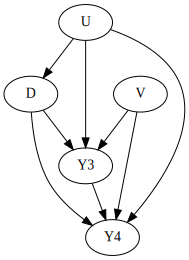

In [58]:
g = CausalGraphicalModel(
    nodes=['Y3', 'Y4', 'D', 'U', 'V'],
    edges=[
        ('Y3', 'Y4'),
        ('D', 'Y3'),
        ('D', 'Y4'),
        ('U', 'Y3'),
        ('U', 'Y4'),
        ('U', 'D'),
        ('V', 'Y3'),
        ('V', 'Y4')
    ]
)
g.draw()

In [59]:
g.get_all_backdoor_paths('D', 'Y4')

[['D', 'U', 'Y3', 'Y4'], ['D', 'U', 'Y3', 'V', 'Y4'], ['D', 'U', 'Y4']]

The backdoor paths of concern for the effect of $D$ on $Y_4$ are: $D \leftarrow U \rightarrow Y_4$ and $D \leftarrow U \rightarrow Y_3 \rightarrow Y_4$.  
**Note** Consider finding more data to condition on for $U$, eg average income for the neighborhood. Then I could use the Back-door criterion.  
**Note** In order to satisfy the Front-door criterion for use of $Y_3$ I would need to condition on both $U$ (exhaustiveness) and $V$ (isolation).  

Data to consider for $U$:  
[School district demographics](https://data.cityofnewyork.us/Education/demographics-with-school-district-map/yik8-b6tu) Includes % receiving public assistance, as well as race data (which I do not want to use but it may capture the factors that affect school quality).  
[School demographics](https://data.cityofnewyork.us/Education/2013-2018-Demographic-Snapshot-School/s52a-8aq6) Includes racial data and % impoverished, which would be great and I will just have to check that it covers the schools I am considering.

In [31]:
df_demo = pd.read_csv('resources/2013_18_Demographics_Wide.csv')
df_demo.head()

,Q0_DBN,school_2013,year_2013,total_enrollment_2013,grd_pk_2013,grd_k_2013,grd_1_2013,grd_2_2013,grd_3_2013,grd_4_2013,grd_5_2013,grd_6_2013,grd_7_2013,grd_8_2013,grd_9_2013,grd_10_2013,grd_11_2013,grd_12_2013,n_female_2013,perc_female_2013,n_male_2013,perc_male_2013,n_asian_2013,perc_asian_2013,n_black_2013,perc_black_2013,n_hispanic_2013,perc_hispanic_2013,n_notrep_2013,perc_notrep_2013,n_white_2013,perc_white_2013,n_disab_2013,perc_disab_2013,n_ell_2013,perc_ell_2013,n_pov_2013,perc_pov_2013,eni_2013,school_2014,year_2014,total_enrollment_2014,grd_pk_2014,grd_k_2014,grd_1_2014,grd_2_2014,grd_3_2014,grd_4_2014,grd_5_2014,grd_6_2014,grd_7_2014,grd_8_2014,grd_9_2014,grd_10_2014,grd_11_2014,grd_12_2014,n_female_2014,perc_female_2014,n_male_2014,perc_male_2014,n_asian_2014,perc_asian_2014,n_black_2014,perc_black_2014,n_hispanic_2014,perc_hispanic_2014,n_notrep_2014,perc_notrep_2014,n_white_2014,perc_white_2014,n_disab_2014,perc_disab_2014,n_ell_2014,perc_ell_2014,n_pov_2014,perc_pov_2014,eni_2014,school_2015,year_2015,total_enrollment_2015,grd_pk_2015,grd_k_2015,grd_1_2015,grd_2_2015,grd_3_2015,grd_4_2015,grd_5_2015,grd_6_2015,grd_7_2015,grd_8_2015,grd_9_2015,grd_10_2015,grd_11_2015,grd_12_2015,n_female_2015,perc_female_2015,n_male_2015,perc_male_2015,n_asian_2015,perc_asian_2015,n_black_2015,perc_black_2015,n_hispanic_2015,perc_hispanic_2015,n_notrep_2015,perc_notrep_2015,n_white_2015,perc_white_2015,n_disab_2015,perc_disab_2015,n_ell_2015,perc_ell_2015,n_pov_2015,perc_pov_2015,eni_2015,school_2016,year_2016,total_enrollment_2016,grd_pk_2016,grd_k_2016,grd_1_2016,grd_2_2016,grd_3_2016,grd_4_2016,grd_5_2016,grd_6_2016,grd_7_2016,grd_8_2016,grd_9_2016,grd_10_2016,grd_11_2016,grd_12_2016,n_female_2016,perc_female_2016,n_male_2016,perc_male_2016,n_asian_2016,perc_asian_2016,n_black_2016,perc_black_2016,n_hispanic_2016,perc_hispanic_2016,n_notrep_2016,perc_notrep_2016,n_white_2016,perc_white_2016,n_disab_2016,perc_disab_2016,n_ell_2016,perc_ell_2016,n_pov_2016,perc_pov_2016,eni_2016,school_2017,year_2017,total_enrollment_2017,grd_pk_2017,grd_k_2017,grd_1_2017,grd_2_2017,grd_3_2017,grd_4_2017,grd_5_2017,grd_6_2017,grd_7_2017,grd_8_2017,grd_9_2017,grd_10_2017,grd_11_2017,grd_12_2017,n_female_2017,perc_female_2017,n_male_2017,perc_male_2017,n_asian_2017,perc_asian_2017,n_black_2017,perc_black_2017,n_hispanic_2017,perc_hispanic_2017,n_notrep_2017,perc_notrep_2017,n_white_2017,perc_white_2017,n_disab_2017,perc_disab_2017,n_ell_2017,perc_ell_2017,n_pov_2017,perc_pov_2017,eni_2017
0,01M015,P.S. 015 Roberto Clemente,2013.0,190.0,26.0,39.0,39.0,21.0,16.0,26.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,48.9,97.0,51.1,9.0,4.7,72.0,37.9,104.0,54.7,2.0,1.1,3.0,1.6,65.0,34.2,19.0,10.0,171.0,90.0,No Data,P.S. 015 Roberto Clemente,2014.0,183.0,18.0,27.0,47.0,31.0,19.0,17.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,45.9,99.0,54.1,8.0,4.4,65.0,35.5,107.0,58.5,1.0,0.5,2.0,1.1,64.0,35.0,17.0,9.3,169.0,92.3,93.5%,P.S. 015 Roberto Clemente,2015.0,176.0,14.0,32.0,33.0,39.0,23.0,17.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,47.2,93.0,52.8,9.0,5.1,57.0,32.4,105.0,59.7,3.0,1.7,2.0,1.1,60.0,34.1,16.0,9.1,149.0,84.7,89.6%,P.S. 015 Roberto Clemente,2016.0,178.0,17.0,28.0,33.0,27.0,31.0,24.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,46.6,95.0,53.4,14.0,7.9,51.0,28.7,105.0,59.0,4.0,2.2,4.0,2.2,51.0,28.7,12.0,6.7,152.0,85.4,89.2%,P.S. 015 Roberto Clemente,2017,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,99,52.1,91,47.9,20,10.5,52,27.4,110,57.9,2,1.1,6,3.2,45,23.7,8,4.2,161,84.7,89.0%
1,01M019,P.S. 019 Asher Levy,2013.0,285.0,36.0,39.0,38.0,36.0,45.0,47.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141.0,49.5,144.0,50.5,41.0,14.4,56.0,19.6,148.0,51.9,10.0,3.5,30.0,10.5,89.0,31.2,25.0,8.8,213.0,74.7,No Data,P.S. 019 Asher Levy,2014.0,270.0,30.0,44.0,40.0,39.0,35.0,40.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,48.9,138.0,51.1,30.0,11.1,47.0,17.4,158.0,58.5,8.0,3.0,27.0,10.0,82.0,30.4,18.0,6.7,200.0,74.1,60.9%,P.S. 019 Asher Levy,2015.0,270.0,21.0,47.0,43.0,41.0,43.0,35.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,

A school's ENI ([Economic Need Index](https://www.schools.nyc.gov/docs/default-source/default-document-library/diversity-in-new-york-city-public-schools-english)) is defined as the likelihood that students are in poverty. It considers whether students are HRA-eligible, living in temporary housing, have a home language other than English and entered the NYC DOE within the last four years, or otherwise the income level of their census tract.  
I will consider the following list:

In [35]:
demo_list = ['Q0_DBN', 'total_enrollment_2017', 'perc_female_2017', 'perc_asian_2017', 'perc_black_2017', 'perc_hispanic_2017', 'perc_notrep_2017', 'perc_white_2017', 'perc_disab_2017', 'perc_ell_2017', 'perc_pov_2017', 'eni_2017']
#I have not decided to use all of these features, but they are the ones that I suspect may be of use at the moment

Merge on school DBN.

In [40]:
df_34 = df_34.merge(df_demo[demo_list], on='Q0_DBN', how='left')
df_34.head()

,Q0_DBN,Q1_1,Q1_2,Q1_3,Q2_1,Q3_1,Q3_2,Q3_3,Q3_4,Q4_1,Q4_2,Q5_1,Q5_2,Q6_1,Q6_2,Q6_3,Q6_4,Q7_1,Q7_2,Q7_3,Q7_4,Q8_R1_C1,Q8_R1_C2,Q8_R2_C1,Q8_R2_C2,Q8_R3_C1,Q8_R3_C2,Q8_R4_C1,Q8_R4_C2,Q8_R5_C1,Q8_R5_C2,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q9_8,Q9_9,Q9_10,Q9_11,Q9_12,Q9_13,Q9_14,Q9_15,Q9_16,Q9_17,Q9_18,Q9_19,Q9_20,Q9_21,Q9_22,Q10_R1_C1,Q10_R1_C2,Q10_R2_C1,Q10_R2_C2,Q10_R3_C1,Q10_R3_C2,Q10_R4_C1,Q10_R4_C2,Q10_R5_C1,Q10_R5_C2,Q11_R1_C1,Q11_R1_C2,Q11_R1_C3,Q11_R1_C4,Q11_R2_C1,Q11_R2_C2,Q11_R2_C3,Q11_R2_C4,Q11_R3_C1,Q11_R3_C2,Q11_R3_C3,Q11_R3_C4,Q11_R4_C1,Q11_R4_C2,Q11_R4_C3,Q11_R4_C4,Q12_C1_R1,Q12_C1_R2,Q12_C1_R3,Q12_C1_R4,Q13_C1_R1,Q13_C1_R2,Q13_C1_R3,Q13_C1_R4,Q13_C2_R1,Q13_C2_R2,Q13_C2_R3,Q13_C2_R4,Q13_C3_R1,Q13_C3_R2,Q13_C3_R3,Q13_C3_R4,Q13_C4_R1,Q13_C4_R2,Q13_C4_R3,Q13_C4_R4,Q13_C5_R1,Q13_C5_R2,Q13_C5_R3,Q13_C5_R4,Q13_C6_R1,Q13_C6_R2,Q13_C6_R3,Q13_C6_R4,Q13_C7_R1,Q13_C7_R2,Q13_C7_R3,Q13_C7_R4,Q13_C8_R1,Q13_C8_R2,Q13_C8_R3,Q13_C8_R4,Q13_C9_R1,Q13_C9_R2,Q13_C9_R3,Q13_C9_R4,Q13_C10_R1,Q13_C10_R2,Q13_C10_R3,Q13_C10_R4,Q13_C11_R1,Q13_C11_R2,Q13_C11_R3,Q13_C11_R4,Q13_C12_R1,Q13_C12_R2,Q13_C12_R3,Q13_C12_R4,Q13_C13_R1,Q13_C13_R2,Q13_C13_R3,Q13_C13_R4,Q13_C14_R1,Q13_C14_R2,Q13_C14_R3,Q13_C14_R4,Q13_C15_R1,Q13_C15_R2,Q13_C15_R3,Q13_C15_R4,Q14_C1_R1,Q14_C1_R2,Q14_C1_R3,Q14_C1_R4,Q14_C2_R1,Q14_C2_R2,Q14_C2_R3,Q14_C2_R4,Q14_C3_R1,Q14_C3_R2,Q14_C3_R3,Q14_C3_R4,Q14_C4_R1,Q14_C4_R2,Q14_C4_R3,Q14_C4_R4,Q14_C5_R1,Q14_C5_R2,Q14_C5_R3,Q14_C5_R4,Q14_C6_R1,Q14_C6_R2,Q14_C6_R3,Q14_C6_R4,Q14_C7_R1,Q14_C7_R2,Q14_C7_R3,Q14_C7_R4,Q14_C8_R1,Q14_C8_R2,Q14_C8_R3,Q14_C8_R4,Q14_C9_R1,Q14_C9_R2,Q14_C9_R3,Q14_C9_R4,Q14_C10_R1,Q14_C10_R2,Q14_C10_R3,Q14_C10_R4,Q14_C11_R1,Q14_C11_R2,Q14_C11_R3,Q14_C11_R4,Q14_C12_R1,Q14_C12_R2,Q14_C12_R3,Q14_C12_R4,Q14_C13_R1,Q14_C13_R2,Q14_C13_R3,Q14_C13_R4,Q14_C14_R1,Q14_C14_R2,Q14_C14_R3,Q14_C14_R4,Q15_C1_R1,Q15_C1_R2,Q15_C1_R3,Q15_C1_R4,Q15_C2_R1,Q15_C2_R2,Q15_C2_R3,Q15_C2_R4,Q15_C3_R1,Q15_C3_R2,Q15_C3_R3,Q15_C3_R4,Q15_C4_R1,Q15_C4_R2,Q15_C4_R3,Q15_C4_R4,Q15_C5_R1,Q15_C5_R2,Q15_C5_R3,Q15_C5_R4,Q15_C6_R1,Q15_C6_R2,Q15_C6_R3,Q15_C6_R4,Q15_C7_R1,Q15_C7_R2,Q15_C7_R3,Q15_C7_R4,Q15_C8_R1,Q15_C8_R2,Q15_C8_R3,Q15_C8_R4,Q15_C9_R1,Q15_C9_R2,Q15_C9_R3,Q15_C9_R4,Q15_C10_R1,Q15_C10_R2,Q15_C10_R3,Q15_C10_R4,Q15_C11_R1,Q15_C11_R2,Q15_C11_R3,Q15_C11_R4,Q15_C12_R1,Q15_C12_R2,Q15_C12_R3,Q15_C12_R4,Q15_C13_R1,Q15_C13_R2,Q15_C13_R3,Q15_C13_R4,Q15_C14_R1,Q15_C14_R2,Q15_C14_R3,Q15_C14_R4,Q16_C1_R1,Q16_C1_R2,Q16_C1_R3,Q16_C1_R4,Q16_C2_R1,Q16_C2_R2,Q16_C2_R3,Q16_C2_R4,Q16_C3_R1,Q16_C3_R2,Q16_C3_R3,Q16_C3_R4,Q16_C4_R1,Q16_C4_R2,Q16_C4_R3,Q16_C4_R4,Q16_C5_R1,Q16_C5_R2,Q16_C5_R3,Q16_C5_R4,Q16_C6_R1,Q16_C6_R2,Q16_C6_R3,Q16_C6_R4,Q16_C7_R1,Q16_C7_R2,Q16_C7_R3,Q16_C7_R4,Q16_C8_R1,Q16_C8_R2,Q16_C8_R3,Q16_C8_R4,Q16_C9_R1,Q16_C9_R2,Q16_C9_R3,Q16_C9_R4,Q16_C10_R1,Q16_C10_R2,Q16_C10_R3,Q16_C10_R4,Q16_C11_R1,Q16_C11_R2,Q16_C11_R3,Q16_C11_R4,Q16_C12_R1,Q16_C12_R2,Q16_C12_R3,Q16_C12_R4,Q16_C13_R1,Q16_C13_R2,Q16_C13_R3,Q16_C13_R4,Q16_C14_R1,Q16_C14_R2,Q16_C14_R3,Q16_C14_R4,Q17_C1_R1,Q17_C1_R2,Q17_C1_R3,Q17_C1_R4,Q17_C2_R1,Q17_C2_R2,Q17_C2_R3,Q17_C2_R4,Q17_C3_R1,Q17_C3_R2,Q17_C3_R3,Q17_C3_R4,Q17_C4_R1,Q17_C4_R2,Q17_C4_R3,Q17_C4_R4,Q17_C5_R1,Q17_C5_R2,Q17_C5_R3,Q17_C5_R4,Q17_C6_R1,Q17_C6_R2,Q17_C6_R3,Q17_C6_R4,Q17_C7_R1,Q17_C7_R2,Q17_C7_R3,Q17_C7_R4,Q17_C8_R1,Q17_C8_R2,Q17_C8_R3,Q17_C8_R4,Q17_C9_R1,Q17_C9_R2,Q17_C9_R3,Q17_C9_R4,Q17_C10_R1,Q17_C10_R2,Q17_C10_R3,Q17_C10_R4,Q17_C11_R1,Q17_C11_R2,Q17_C11_R3,Q17_C11_R4,Q17_C12_R1,Q17_C12_R2,Q17_C12_R3,Q17_C12_R4,Q17_C13_R1,Q17_C13_R2,Q17_C13_R3,Q17_C13_R4,Q17_C14_R1,Q17_C14_R2,Q17_C14_R3,Q17_C14_R4,Q18_C1_R1,Q18_C1_R2,Q18_C1_R3,Q18_C1_R4,Q18_C2_R1,Q18_C2_R2,Q18_C2_R3,Q18_C2_R4,Q18_C3_R1,Q18_C3_R2,Q18_C3_R3,Q18_C3_R4,Q18_C4_R1,Q18_C4_R2,Q18_C4_R3,Q18_C4_R4,Q18_C5_R1,Q18_C5_R2,Q18_C5_R3,Q18_C5_R4,Q19_C1_R1,Q19_C1_R2,Q19_C1_R3,Q19_C1_R4,Q20_1,Q20_2,Q21_R1_C1,Q21_R1_C2,Q21_R1_C3,Q21_R1_C4,Q21_R2_C1,Q21_R2_C2,Q21_R2_C3,Q21_R2_C4,Q21_R3_C1,Q21_R3_C2,Q21_R3_C3,Q21_R3_C4,Q21_R4_C1,Q21_R4_C2,Q21_R4_C3,Q21_R4_C4,Q21_R5_C1,Q21_R5_C2,Q21

Fix `eni_2017` feature to be of the type float.

In [48]:
type(df_34['eni_2017'][1])

str

In [53]:
def strip_perc(x):
    return float(x[:-1])
df_34['eni_2017'] = df_34['eni_2017'].apply(lambda x: strip_perc(x))

***

[Estimating Causal Effects](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch24.pdf)

In [63]:
df_34['Q3_ft'] = df_34['Q3_1'] + df_34['Q3_2']
#New feature for whether a school has a full-time arts supervisor

Consider the effect of having a full-time supervisor `Q3_ft`

In [66]:
X = df_34[['Q3_ft', 'perc_34_3_2017', 'total_enrollment_2017', 'perc_pov_2017']]
Y = df_34['perc_34_4_2018']

Some entry is 's'

In [83]:
X[X == 's']

,Q3_ft,perc_34_3_2017,total_enrollment_2017,perc_pov_2017
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [79]:
model = OLS(Y, X.astype(float))
#results = model.fit()

ValueError: could not convert string to float: 's'

In [54]:
df_34.head()

,Q0_DBN,Q1_1,Q1_2,Q1_3,Q2_1,Q3_1,Q3_2,Q3_3,Q3_4,Q4_1,Q4_2,Q5_1,Q5_2,Q6_1,Q6_2,Q6_3,Q6_4,Q7_1,Q7_2,Q7_3,Q7_4,Q8_R1_C1,Q8_R1_C2,Q8_R2_C1,Q8_R2_C2,Q8_R3_C1,Q8_R3_C2,Q8_R4_C1,Q8_R4_C2,Q8_R5_C1,Q8_R5_C2,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q9_8,Q9_9,Q9_10,Q9_11,Q9_12,Q9_13,Q9_14,Q9_15,Q9_16,Q9_17,Q9_18,Q9_19,Q9_20,Q9_21,Q9_22,Q10_R1_C1,Q10_R1_C2,Q10_R2_C1,Q10_R2_C2,Q10_R3_C1,Q10_R3_C2,Q10_R4_C1,Q10_R4_C2,Q10_R5_C1,Q10_R5_C2,Q11_R1_C1,Q11_R1_C2,Q11_R1_C3,Q11_R1_C4,Q11_R2_C1,Q11_R2_C2,Q11_R2_C3,Q11_R2_C4,Q11_R3_C1,Q11_R3_C2,Q11_R3_C3,Q11_R3_C4,Q11_R4_C1,Q11_R4_C2,Q11_R4_C3,Q11_R4_C4,Q12_C1_R1,Q12_C1_R2,Q12_C1_R3,Q12_C1_R4,Q13_C1_R1,Q13_C1_R2,Q13_C1_R3,Q13_C1_R4,Q13_C2_R1,Q13_C2_R2,Q13_C2_R3,Q13_C2_R4,Q13_C3_R1,Q13_C3_R2,Q13_C3_R3,Q13_C3_R4,Q13_C4_R1,Q13_C4_R2,Q13_C4_R3,Q13_C4_R4,Q13_C5_R1,Q13_C5_R2,Q13_C5_R3,Q13_C5_R4,Q13_C6_R1,Q13_C6_R2,Q13_C6_R3,Q13_C6_R4,Q13_C7_R1,Q13_C7_R2,Q13_C7_R3,Q13_C7_R4,Q13_C8_R1,Q13_C8_R2,Q13_C8_R3,Q13_C8_R4,Q13_C9_R1,Q13_C9_R2,Q13_C9_R3,Q13_C9_R4,Q13_C10_R1,Q13_C10_R2,Q13_C10_R3,Q13_C10_R4,Q13_C11_R1,Q13_C11_R2,Q13_C11_R3,Q13_C11_R4,Q13_C12_R1,Q13_C12_R2,Q13_C12_R3,Q13_C12_R4,Q13_C13_R1,Q13_C13_R2,Q13_C13_R3,Q13_C13_R4,Q13_C14_R1,Q13_C14_R2,Q13_C14_R3,Q13_C14_R4,Q13_C15_R1,Q13_C15_R2,Q13_C15_R3,Q13_C15_R4,Q14_C1_R1,Q14_C1_R2,Q14_C1_R3,Q14_C1_R4,Q14_C2_R1,Q14_C2_R2,Q14_C2_R3,Q14_C2_R4,Q14_C3_R1,Q14_C3_R2,Q14_C3_R3,Q14_C3_R4,Q14_C4_R1,Q14_C4_R2,Q14_C4_R3,Q14_C4_R4,Q14_C5_R1,Q14_C5_R2,Q14_C5_R3,Q14_C5_R4,Q14_C6_R1,Q14_C6_R2,Q14_C6_R3,Q14_C6_R4,Q14_C7_R1,Q14_C7_R2,Q14_C7_R3,Q14_C7_R4,Q14_C8_R1,Q14_C8_R2,Q14_C8_R3,Q14_C8_R4,Q14_C9_R1,Q14_C9_R2,Q14_C9_R3,Q14_C9_R4,Q14_C10_R1,Q14_C10_R2,Q14_C10_R3,Q14_C10_R4,Q14_C11_R1,Q14_C11_R2,Q14_C11_R3,Q14_C11_R4,Q14_C12_R1,Q14_C12_R2,Q14_C12_R3,Q14_C12_R4,Q14_C13_R1,Q14_C13_R2,Q14_C13_R3,Q14_C13_R4,Q14_C14_R1,Q14_C14_R2,Q14_C14_R3,Q14_C14_R4,Q15_C1_R1,Q15_C1_R2,Q15_C1_R3,Q15_C1_R4,Q15_C2_R1,Q15_C2_R2,Q15_C2_R3,Q15_C2_R4,Q15_C3_R1,Q15_C3_R2,Q15_C3_R3,Q15_C3_R4,Q15_C4_R1,Q15_C4_R2,Q15_C4_R3,Q15_C4_R4,Q15_C5_R1,Q15_C5_R2,Q15_C5_R3,Q15_C5_R4,Q15_C6_R1,Q15_C6_R2,Q15_C6_R3,Q15_C6_R4,Q15_C7_R1,Q15_C7_R2,Q15_C7_R3,Q15_C7_R4,Q15_C8_R1,Q15_C8_R2,Q15_C8_R3,Q15_C8_R4,Q15_C9_R1,Q15_C9_R2,Q15_C9_R3,Q15_C9_R4,Q15_C10_R1,Q15_C10_R2,Q15_C10_R3,Q15_C10_R4,Q15_C11_R1,Q15_C11_R2,Q15_C11_R3,Q15_C11_R4,Q15_C12_R1,Q15_C12_R2,Q15_C12_R3,Q15_C12_R4,Q15_C13_R1,Q15_C13_R2,Q15_C13_R3,Q15_C13_R4,Q15_C14_R1,Q15_C14_R2,Q15_C14_R3,Q15_C14_R4,Q16_C1_R1,Q16_C1_R2,Q16_C1_R3,Q16_C1_R4,Q16_C2_R1,Q16_C2_R2,Q16_C2_R3,Q16_C2_R4,Q16_C3_R1,Q16_C3_R2,Q16_C3_R3,Q16_C3_R4,Q16_C4_R1,Q16_C4_R2,Q16_C4_R3,Q16_C4_R4,Q16_C5_R1,Q16_C5_R2,Q16_C5_R3,Q16_C5_R4,Q16_C6_R1,Q16_C6_R2,Q16_C6_R3,Q16_C6_R4,Q16_C7_R1,Q16_C7_R2,Q16_C7_R3,Q16_C7_R4,Q16_C8_R1,Q16_C8_R2,Q16_C8_R3,Q16_C8_R4,Q16_C9_R1,Q16_C9_R2,Q16_C9_R3,Q16_C9_R4,Q16_C10_R1,Q16_C10_R2,Q16_C10_R3,Q16_C10_R4,Q16_C11_R1,Q16_C11_R2,Q16_C11_R3,Q16_C11_R4,Q16_C12_R1,Q16_C12_R2,Q16_C12_R3,Q16_C12_R4,Q16_C13_R1,Q16_C13_R2,Q16_C13_R3,Q16_C13_R4,Q16_C14_R1,Q16_C14_R2,Q16_C14_R3,Q16_C14_R4,Q17_C1_R1,Q17_C1_R2,Q17_C1_R3,Q17_C1_R4,Q17_C2_R1,Q17_C2_R2,Q17_C2_R3,Q17_C2_R4,Q17_C3_R1,Q17_C3_R2,Q17_C3_R3,Q17_C3_R4,Q17_C4_R1,Q17_C4_R2,Q17_C4_R3,Q17_C4_R4,Q17_C5_R1,Q17_C5_R2,Q17_C5_R3,Q17_C5_R4,Q17_C6_R1,Q17_C6_R2,Q17_C6_R3,Q17_C6_R4,Q17_C7_R1,Q17_C7_R2,Q17_C7_R3,Q17_C7_R4,Q17_C8_R1,Q17_C8_R2,Q17_C8_R3,Q17_C8_R4,Q17_C9_R1,Q17_C9_R2,Q17_C9_R3,Q17_C9_R4,Q17_C10_R1,Q17_C10_R2,Q17_C10_R3,Q17_C10_R4,Q17_C11_R1,Q17_C11_R2,Q17_C11_R3,Q17_C11_R4,Q17_C12_R1,Q17_C12_R2,Q17_C12_R3,Q17_C12_R4,Q17_C13_R1,Q17_C13_R2,Q17_C13_R3,Q17_C13_R4,Q17_C14_R1,Q17_C14_R2,Q17_C14_R3,Q17_C14_R4,Q18_C1_R1,Q18_C1_R2,Q18_C1_R3,Q18_C1_R4,Q18_C2_R1,Q18_C2_R2,Q18_C2_R3,Q18_C2_R4,Q18_C3_R1,Q18_C3_R2,Q18_C3_R3,Q18_C3_R4,Q18_C4_R1,Q18_C4_R2,Q18_C4_R3,Q18_C4_R4,Q18_C5_R1,Q18_C5_R2,Q18_C5_R3,Q18_C5_R4,Q19_C1_R1,Q19_C1_R2,Q19_C1_R3,Q19_C1_R4,Q20_1,Q20_2,Q21_R1_C1,Q21_R1_C2,Q21_R1_C3,Q21_R1_C4,Q21_R2_C1,Q21_R2_C2,Q21_R2_C3,Q21_R2_C4,Q21_R3_C1,Q21_R3_C2,Q21_R3_C3,Q21_R3_C4,Q21_R4_C1,Q21_R4_C2,Q21_R4_C3,Q21_R4_C4,Q21_R5_C1,Q21_R5_C2,Q21